## Get the data

In [ ]:
import pandas as pd

data = pd.read_csv("/content/train_clean.csv")
data.head()

,Unique ID,Type,Text,3.1.1,3.1.2,3.2.1,3.2.2,3.3.1,3.3.2,3.3.3,...,3.8.2,3.9.1,3.9.2,3.9.3,3.a.1,3.b.1,3.b.2,3.b.3,3.c.1,3.d.1
0,12555.0,Grant,Centers of Biomedical Research Excellence (COB...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,14108.0,Grant,Research on Regenerative Medicine Introduction...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,23168.0,Organization,Catholic Health Association of India (CHAI): T...,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,219512.0,Contract,Quality Improvement Initiatives for Diabetes,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,274093.0,Tender,Provision of Thalassemia Drugs and Disposables...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Label Distribution

<Axes: >

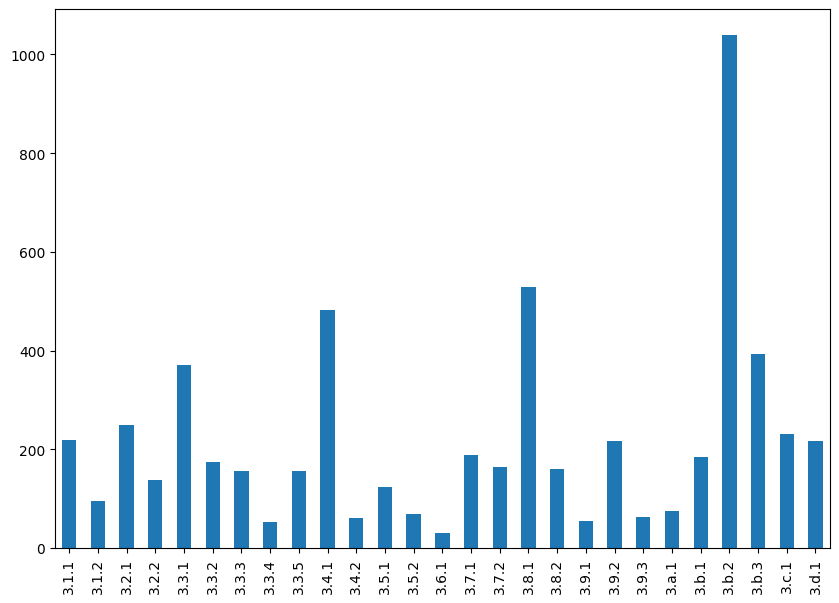

In [ ]:
import matplotlib.pyplot as plt

text_labels = data.iloc[:, 3:len(data.columns)]
labels_distribution = text_labels.sum()

plt.figure(figsize = (10, 7))
labels_distribution.plot.bar()

## Number of labels for each text

In [ ]:
import numpy as np

y = data.iloc[:, 3:len(data.columns)].to_numpy()
count_labels = [np.count_nonzero(y[i] == 1) for i in range(len(y))]

In [ ]:
count_labels[:10]

[2, 1, 4, 1, 2, 2, 3, 2, 1, 2]

<Axes: >

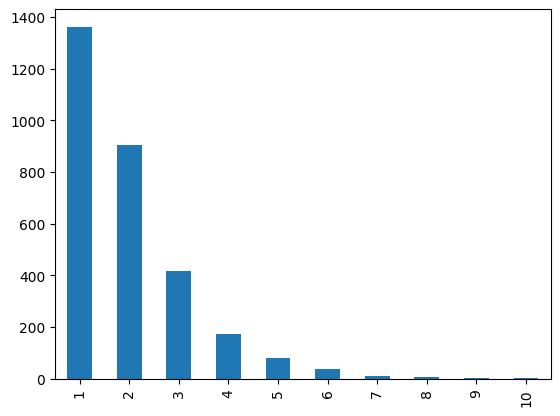

In [ ]:
data["total_labels"] = count_labels
data["total_labels"].value_counts().plot(kind = "bar")

In [ ]:
# total words in each text
data["total_words"] = data["Text"].apply(lambda n: len(n.split()))
data["total_words"].head(10)

0    398
1    305
2    304
3      5
4    514
5    470
6    307
7     12
8    217
9    381
Name: total_words, dtype: int64

In [ ]:
# get the max of total words
data["total_words"].max()

3753

## Data preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size = 0.2)

In [ ]:
len(train_df), len(test_df)

(2396, 599)

In [ ]:
import random
random.choice(train_df["Text"])

'Affordable Antiretroviral Drugs for Middle-income Countries'

In [ ]:
random.choice(text_labels.to_numpy())

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

## Converting Text into Numbers

In [ ]:
# How long is each sentence on average
sent_lens = [len(sentence.split()) for sentence in train_df["Text"]]
avg_sent_lens = np.mean(sent_lens)
avg_sent_lens

458.6193656093489

(array([1161.,  369.,  232.,  136.,  104.,   66.,   74.,   63.,   47.,
          41.,   21.,   23.,   17.,   14.,    9.,    5.,    4.,    5.,
           3.,    2.]),
 array([2.00000e+00, 1.89550e+02, 3.77100e+02, 5.64650e+02, 7.52200e+02,
        9.39750e+02, 1.12730e+03, 1.31485e+03, 1.50240e+03, 1.68995e+03,
        1.87750e+03, 2.06505e+03, 2.25260e+03, 2.44015e+03, 2.62770e+03,
        2.81525e+03, 3.00280e+03, 3.19035e+03, 3.37790e+03, 3.56545e+03,
        3.75300e+03]),
 <BarContainer object of 20 artists>)

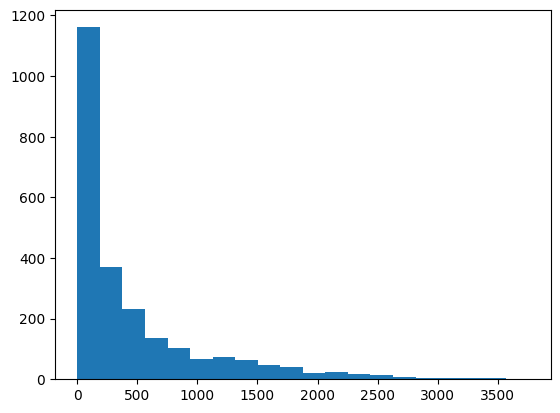

In [ ]:
# the distribution of sent_lens
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins = 20)

In [ ]:
# How long of a sentence length covers 95% of examples
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

1787

In [ ]:
# max length sentence in traning set
max(sent_lens)

3753

### Text vectorization (Tokenization)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Setup text vectorization variables (again)
max_vocab_length = 68000 # how many words in ur vocabulary

In [ ]:
text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_sequence_length = output_seq_len)

In [ ]:
# fit the text vector to the training data
text_vectorizer.adapt(train_df["Text"])

In [ ]:
# test our text vectorizer
target_sentence = random.choice(train_df["Text"])

print(f"Text:\n{target_sentence}")
print(f"\nLength of Text:\n{len(target_sentence.split())}")
print(f"\nVectorized Text:\n{text_vectorizer([target_sentence])}")

Text:
Support for Integrated, Collaborative Research: Purpose    The National Heart, Lung, and Blood Institute (NHLBI) Program Project Grant (P01) supports research related to fundamental processes and diseases of the heart, blood and lymphatic vessels, lungs, and blood, including transfusion medicine, blood resources, and sleep disorders and other programs including implementation science, health disparities, and translation research that address the mission of the Institute.  This FOA requires a minimum of three interrelated research projects that investigate a complex biomedical theme or research question. The projects may be supported by core units, if justified, to facilitate economy of effort, space, and equipment. The NHLBI provides support for Program Project Grants (PPGs) in the belief that collaborative research efforts can accelerate the acquisition of knowledge more effectively than a simple aggregate of research projects that have no interaction or thematic integration.   

In [ ]:
# How many words in our training vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in Vocabulary: {len(words_in_vocab)}")
print(f"Most 5 common words in Vocabulary: {words_in_vocab[:5]}")
print(f"Least 5 common words in Vocabulary: {words_in_vocab[-5:]}")

Number of words in Vocabulary: 37734
Most 5 common words in Vocabulary: ['', '[UNK]', 'the', 'and', 'of']
Least 5 common words in Vocabulary: ['000date', '00087798', '0000hcwg201712685', '00007', '0000001690']


In [ ]:
# get config
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None, None),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 1787,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 37734}

### Embedding

In [ ]:
from tensorflow.keras import layers

# create embedding layer
token_embed = layers.Embedding(input_dim = len(words_in_vocab), # length of vocabulary
                               output_dim = 128, # Note: different embedding sizes result in drastically different numbers of parameters to train
                               mask_zero = True,  # Use masking to handle variable sequence lengths (save space)
                               name = "token_embedding")

In [ ]:
# sample embedding
print(f"Sentence Before Vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence After Vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence After Embedding:\n{embedded_sentence}\n")
print(f"Embedded Sentence Shape:\n{embedded_sentence.shape}")

Sentence Before Vectorization:
Support for Integrated, Collaborative Research: Purpose    The National Heart, Lung, and Blood Institute (NHLBI) Program Project Grant (P01) supports research related to fundamental processes and diseases of the heart, blood and lymphatic vessels, lungs, and blood, including transfusion medicine, blood resources, and sleep disorders and other programs including implementation science, health disparities, and translation research that address the mission of the Institute.  This FOA requires a minimum of three interrelated research projects that investigate a complex biomedical theme or research question. The projects may be supported by core units, if justified, to facilitate economy of effort, space, and equipment. The NHLBI provides support for Program Project Grants (PPGs) in the belief that collaborative research efforts can accelerate the acquisition of knowledge more effectively than a simple aggregate of research projects that have no interaction or

### One hot encoding for type of text

In [ ]:
train_df["Type"].to_numpy()

array(['Contract', 'Grant', 'Grant', ..., 'Grant', 'Organization', 'News'],
      dtype=object)

In [ ]:
# use tensorflow to create one-hot encoded tensor of our "Type" column
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# first apply label encoding
label_encoder = LabelEncoder()
integer_encoded_train = label_encoder.fit_transform(train_df["Type"].to_numpy())
integer_encoded_test = label_encoder.fit_transform(test_df["Type"].to_numpy())

# now we can apply one hot encoding
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded_train = integer_encoded_train.reshape(len(integer_encoded_train), 1)
integer_encoded_test = integer_encoded_test.reshape(len(integer_encoded_test), 1)

train_type_one_hot = onehot_encoder.fit_transform(integer_encoded_train)
test_type_one_hot = onehot_encoder.fit_transform(integer_encoded_test)

In [ ]:
len_type_one_hot = len(train_type_one_hot[0])
len_type_one_hot

8

In [ ]:
train_type_one_hot

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
test_type_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
train_type_one_hot[0].dtype

dtype('float64')

In [ ]:
train_type_one_hot.shape

(2396, 8)

## Build the model

In [ ]:
# 1. Token inputs
token_inputs = layers.Input(shape = [], dtype = "string", name = "token_inputs")
token_vectorization = text_vectorizer(token_inputs)
token_embeddings = token_embed(token_vectorization)

token_cnn = layers.Bidirectional(layers.LSTM(32))(token_embeddings)
token_outputs = layers.Dense(256, activation = "relu")(token_cnn)
token_model = tf.keras.Model(inputs = token_inputs, outputs = token_outputs)

# 2. Type inputs
type_inputs = layers.Input(shape = (len_type_one_hot,), dtype = tf.float64, name = "type_inputs")
type_outputs = layers.Dense(64, activation = "relu")(type_inputs)
type_model = tf.keras.Model(inputs = type_inputs, outputs = type_outputs)

# 3. Combined
combined_embeddings = layers.Concatenate(name = "token_type_hybrid_embedding")([token_model.output, type_model.output])

# 4. Output layer
output_layer = layers.Dense(27, activation = "softmax", name = "output_layer")(combined_embeddings)

# 5. Put all the layers
model = tf.keras.Model(inputs = [token_model.input, type_model.input], outputs = output_layer, name = "model")

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 text_vectorization (TextVe  (None, 1787)                 0         ['token_inputs[0][0]']        
 ctorization)                                                                                     
                                                                                                  
 token_embedding (Embedding  (None, 1787, 128)            4829952   ['text_vectorization[1][0]']  
 )                                                                                                
                                                                                              

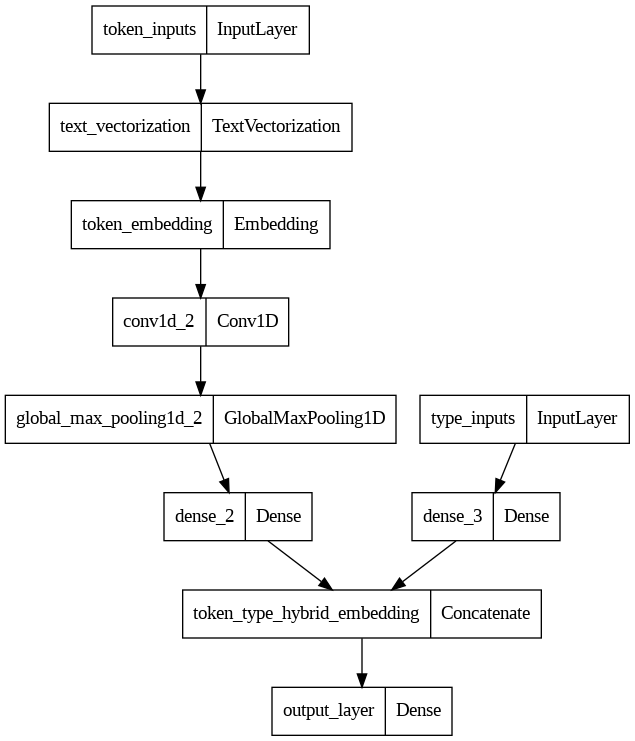

In [ ]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
# compile the model
model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

## Create the dataset

In [ ]:
# create training datasets (for all inputs)
train_sentences = train_df["Text"].to_numpy()
train_labels_one_hot = train_df.iloc[:, 3:len(train_df.columns)-2]
train_labels_one_hot = train_labels_one_hot.to_numpy()

train_labels_one_hot[:5], train_sentences[:5]

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
         0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
         0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0]]),
 array(['Safe, Affordable, and Effective Medicines for Ukrainians (SAFEMed)',
        "Support for Strategies and Activities to Eliminate Congenital Syphilis, Prevent Antibiotic Resistant Gonorrhea, Reduce Primary and Secondary Syphilis Overview    CDC estimates that approximately 20 million new, viral and bacterial sexually transmitted infections occur each year and that almost half of them are among young people ages 15 to 24. Three curable bacterial sexually transmitted diseases (STDs): chl

In [ ]:
# create test datasets (for all inputs)
test_sentences = test_df["Text"].to_numpy()
test_labels_one_hot = test_df.iloc[:, 3:len(test_df.columns)-2]
test_labels_one_hot = test_labels_one_hot.to_numpy()

test_labels_one_hot[:5], test_sentences[:5]

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0]]),
 array(["Early-life Factors and Cancer Development Later in Life: Purpose    The purpose of this Funding Opportunity Announcement (FOA) is to stimulate research focused on the role of early-life factors (maternal-paternal, in utero, birth and infancy, puberty, adolescence, and young adult years) in cancer development later in life. Given that current emerging evidence from limited research indicates a potentially important role for early-life events and exposures in cancer development, it is n

In [ ]:
# for training set
train_token_type_data = tf.data.Dataset.from_tensor_slices((train_sentences, # train token
                                                            train_type_one_hot)) # train type
train_token_type_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels

train_token_type_dataset = tf.data.Dataset.zip((train_token_type_data, train_token_type_labels)) # combine data and labels
train_token_type_dataset = train_token_type_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch

In [ ]:
# for test set
test_token_type_data = tf.data.Dataset.from_tensor_slices((test_sentences, # test_token
                                                           test_type_one_hot)) # test_type
test_token_type_labels = tf.data.Dataset.from_tensor_slices(test_labels_one_hot) # test labels

test_token_type_dataset = tf.data.Dataset.zip((test_token_type_data, test_token_type_labels))# combine data and labels
test_token_type_dataset = test_token_type_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch

## Fit the model

In [ ]:
history = model.fit(train_token_type_dataset,
                    steps_per_epoch = len(train_token_type_dataset),
                    epochs = 5,
                    validation_data = test_token_type_dataset,
                    validation_steps = int(0.1 * len(test_token_type_dataset)))

Epoch 1/5
75/75 [==============================] - 7s 98ms/step - loss: 9.1628 - accuracy: 0.1866 - val_loss: 9.2905 - val_accuracy: 0.1875
Epoch 2/5
75/75 [==============================] - 7s 94ms/step - loss: 10.3853 - accuracy: 0.1649 - val_loss: 8.1913 - val_accuracy: 0.1250
Epoch 3/5
75/75 [==============================] - 6s 85ms/step - loss: 11.1950 - accuracy: 0.1644 - val_loss: 9.8532 - val_accuracy: 0.1875
Epoch 4/5
75/75 [==============================] - 7s 97ms/step - loss: 12.5836 - accuracy: 0.1636 - val_loss: 9.9025 - val_accuracy: 0.0938
Epoch 5/5
75/75 [==============================] - 7s 99ms/step - loss: 13.4454 - accuracy: 0.1603 - val_loss: 17.6208 - val_accuracy: 0.0312
